# Pseudocode

 ## Cleaning:
    - NaN/?/Blank
        - waterfront
        - view
        - yr_rennovated
        - sqft_basement
    - whitespace *no issue
    - format to int/float
        - view
        - waterfront
        - condition
        - grade
        - sqft_basement
    - deal with dupes
        - several properties are listed more than once, suggesting they were bought/sold during this timeframe. 
    - categorical encoding
        - bedrooms
        - bathrooms
        - floors
        - zipcode
        - waterfront
        - view
        - condition
        - grade
    - duplicate properties
        - Located, need to decide how to treat. 
    - drop unused columns
        - lat/long once done with all other steps. Technically this combination is categorical.
        - date
        - sqft_basement? - 454 records do not have a value here--we would need to drop these records at a minimum.
    - save cleaned data

## Ideas for stakeholders:
 - looking for properties to flip
    - Maybe look at adding sqft or bedrooms/bathrooms to see what improvements add most value?
 - looking for investment properties
     - identify combinations of bedrooms/bathrooms/year built/etc that are underpriced?
 - real estate agents providing guidance to sellers about what price they can expect for their home.
     - define ranges of price expected based on bedrooms/bathrooms/sqft/etc.
    

# Imports

In [ ]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Simple Data - omitted columns recommended in project description


In [72]:
simple_housing = pd.read_csv('../data/kc_house_data.csv')

In [74]:
complexities = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [75]:
simple_housing.drop(columns=complexities, inplace=True)

In [76]:
simple_housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [78]:
simple_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


# Full EDA

In [2]:
kc_housing = pd.read_csv('../data/kc_house_data.csv')


In [3]:
kc_housing.shape

(21597, 21)

In [4]:
kc_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [62]:
columns_of_note = list(kc_housing.columns)[3:8]

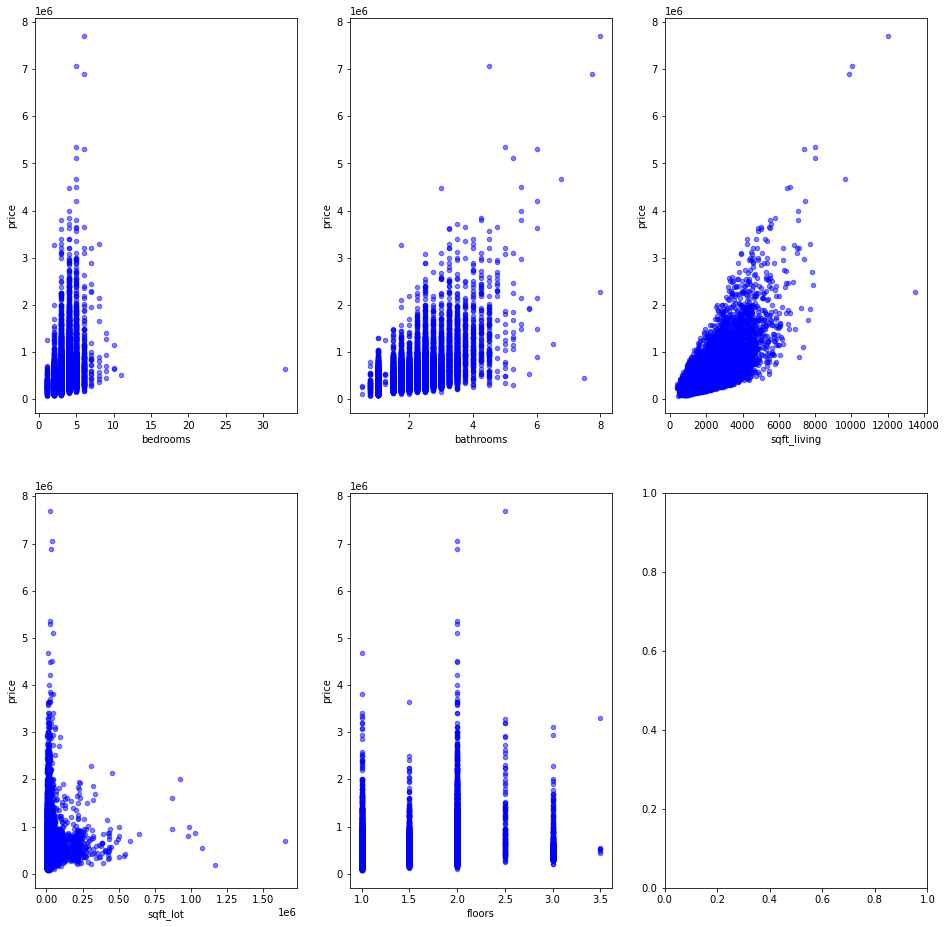

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,16))


for xcol, ax in zip(kc_housing.columns[3:8], [x for v in axes for x in v]):
    kc_housing.plot.scatter(x=xcol, y='price', ax=ax, alpha=0.5, color='b')


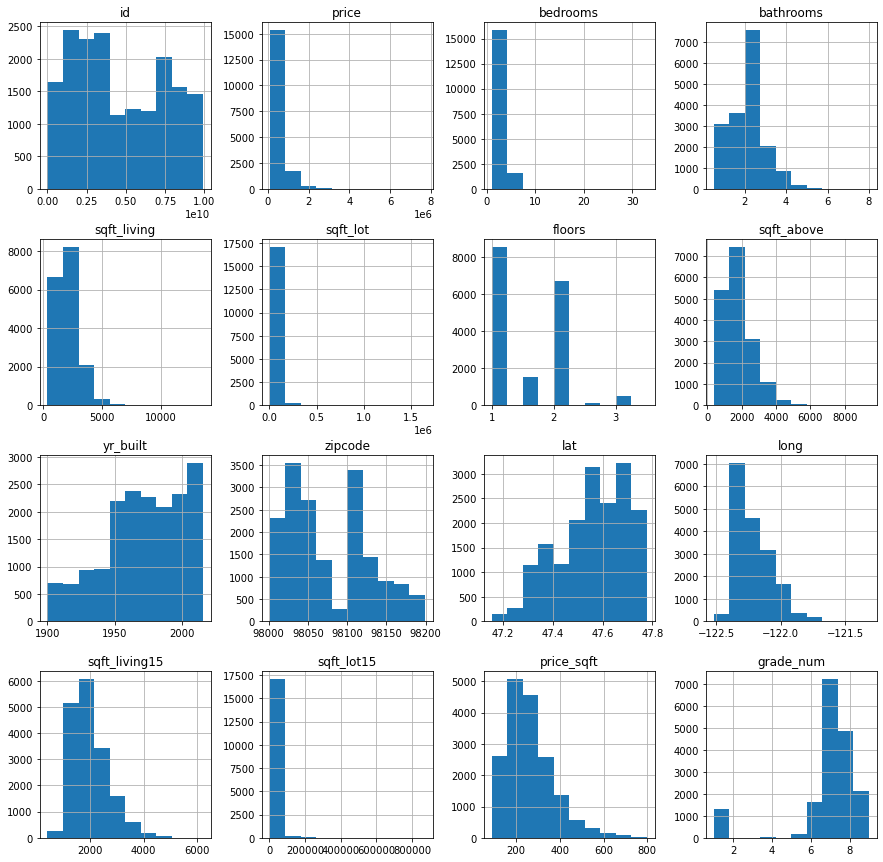

In [49]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
kc_housing.hist(ax = ax);

In [6]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Looking for NANs
kc_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Added price/sqft feature

In [8]:
kc_housing['price_sqft'] = kc_housing['price']/kc_housing['sqft_living']

In [9]:
kc_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429


#### Addressing Waterfront

There are ~2400 NA cells, no easy way to determine if waterfront or not. Recommend we drop this whole column--even if all of the NA cells should be YES for waterfront, that's less than 10% of our dataset, likely not meaningful to our analysis.


In [10]:
kc_housing['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [11]:
sum(kc_housing['waterfront'].isna())

2376

In [12]:
kc_housing['waterfront'] = kc_housing['waterfront'].fillna('N/A')

#### Addressing View

Doesn't seem to be many rows with na. Maybe encode as NA or preferably drop?

In [13]:
sum(kc_housing['view'].isna())

63

In [14]:
kc_housing['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [15]:
# code to replace empty with N/A - add inplace if we decide to take this approach.
kc_housing['view'] = kc_housing['view'].fillna('N/A')

#### Addressing yr_renovated

~ 78% have 0 values, so assume they were not rennovated. I think rennovations are a meaningful datapoint, so we should encode this somehow. We could think about how recent the rennovation was to see if there is a meaningful relationship--for example, a home rennovated in 2020 is likely to sell better than a home rennovated only in 1980. Maybe we do some research on this and decide on a breakpoint for rennovated before/after? We could do a simple linear regression between yr renovated and price...

In [16]:
sum(kc_housing['yr_renovated'].isna())

3842

In [17]:
kc_housing['yr_renovated'].value_counts(sort=False).head(75)

0.0       17011
1985.0       14
1986.0       14
1987.0       14
1988.0       11
          ...  
1980.0        8
1981.0        4
1946.0        1
1982.0        8
1983.0       15
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
kc_housing['yr_renovated'] = kc_housing['yr_renovated'].fillna('N/A')

In [19]:
#dropping N/A for now to make model function.
kc_housing = kc_housing[(kc_housing.yr_renovated != 'N/A')]

#### Duplicate Properties

In [20]:
# Looking for duplicate properties

kc_housing['id'].duplicated().sum()

115

In [21]:
# Identify instances of the same property appearing more than once in the data set based on lattitude, longitude
# How do we treat this? Might not matter since there is only ~4-5 months of data here. as long as listing date 
# is different, probably OK to treat these as unique listings.


kc_housing[kc_housing.duplicated(subset=['id'], keep=False)].sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,N/A,NONE,...,2400,0.0,1991,0,98002,47.3262,-122.214,2060,7316,116.666667
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,NO,NONE,...,2400,0.0,1991,0,98002,47.3262,-122.214,2060,7316,125.000000
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,NO,NONE,...,1480,0.0,1980,0,98023,47.2977,-122.367,1830,6956,165.540541
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,NO,NONE,...,1480,0.0,1980,0,98023,47.2977,-122.367,1830,6956,168.918919
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,NO,NONE,...,2510,0.0,1988,0,98003,47.3473,-122.314,1870,8017,142.629482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/2014,260000.0,2,1.00,700,4800,1.0,NO,NONE,...,700,0.0,1922,0,98122,47.6147,-122.300,1440,4800,371.428571
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,NO,NONE,...,1090,700.0,1904,0,98144,47.5750,-122.288,1360,4080,343.575419
15185,9834200305,7/16/2014,350000.0,3,1.00,1790,3876,1.5,NO,NONE,...,1090,?,1904,0,98144,47.5750,-122.288,1360,4080,195.530726
1084,9834200885,7/17/2014,360000.0,4,2.50,2080,4080,1.0,NO,NONE,...,1040,1040.0,1962,0,98144,47.5720,-122.290,1340,4080,173.076923


#### Addressing grade

This we need to encode as an ordinal.

In [22]:
kc_housing['grade'].value_counts()

7 Average        7362
8 Good           4985
9 Better         2176
6 Low Average    1681
10 Very Good      933
11 Excellent      326
5 Fair            190
12 Luxury          72
4 Low              18
13 Mansion         11
3 Poor              1
Name: grade, dtype: int64

In [23]:
# Create new column for numerical grade. 
# Should either drop df['grade'] or omit it from clean df.
kc_housing['grade_num']= kc_housing['grade'].apply(lambda x: x[:1]).astype(int)

In [24]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17755 non-null  int64  
 1   date           17755 non-null  object 
 2   price          17755 non-null  float64
 3   bedrooms       17755 non-null  int64  
 4   bathrooms      17755 non-null  float64
 5   sqft_living    17755 non-null  int64  
 6   sqft_lot       17755 non-null  int64  
 7   floors         17755 non-null  float64
 8   waterfront     17755 non-null  object 
 9   view           17755 non-null  object 
 10  condition      17755 non-null  object 
 11  grade          17755 non-null  object 
 12  sqft_above     17755 non-null  int64  
 13  sqft_basement  17755 non-null  object 
 14  yr_built       17755 non-null  int64  
 15  yr_renovated   17755 non-null  object 
 16  zipcode        17755 non-null  int64  
 17  lat            17755 non-null  float64
 18  long  

#### Addressing sqft_basement

Recommend we drop rows with N/A since we don't have an easy way to encode.
We have 454 unknown values here. need to drop or encode somehow. Maybe has basement or no basement?


In [25]:
kc_housing['sqft_basement'].value_counts()

0.0       10546
?           366
600.0       176
500.0       170
700.0       164
          ...  
266.0         1
2390.0        1
4820.0        1
2050.0        1
274.0         1
Name: sqft_basement, Length: 287, dtype: int64

In [26]:
kc_housing = kc_housing[(kc_housing.sqft_basement != '?')]

In [27]:
kc_housing['sqft_basement'].value_counts()

0.0       10546
600.0       176
500.0       170
700.0       164
400.0       163
          ...  
266.0         1
2390.0        1
4820.0        1
2050.0        1
274.0         1
Name: sqft_basement, Length: 286, dtype: int64

# Encoding Categoricals

In [28]:
# Identify catgeorical values & create new df with only the categorical columns.
categoricals = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'view','waterfront']
cat_df = kc_housing[categoricals]
cat_df.head()

,bedrooms,bathrooms,floors,condition,grade,view,waterfront
0,3,1.00,1.0,Average,7 Average,NONE,N/A
1,3,2.25,2.0,Average,7 Average,NONE,NO
3,4,3.00,1.0,Very Good,7 Average,NONE,NO
4,3,2.00,1.0,Average,8 Good,NONE,NO
5,4,4.50,1.0,Average,11 Excellent,NONE,NO


In [29]:
# OneHot encoding for categorical variables. Drop first column to avoid perfect multicolinearity.
ohe = OneHotEncoder(drop='first')
categorical_cats = ohe.fit_transform(cat_df)
categorical_cats.todense()
categorical_df = pd.DataFrame(categorical_cats.todense(), columns=ohe.get_feature_names(categoricals))
categorical_df.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,...,grade_7 Average,grade_8 Good,grade_9 Better,view_EXCELLENT,view_FAIR,view_GOOD,view_N/A,view_NONE,waterfront_NO,waterfront_YES
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [30]:
categorical_df.shape

(17389, 64)

In [31]:
kc_housing.shape

(17389, 23)

In [32]:
# Append categorical dummies to original dataframe, and drop origical categorical columns.
data = kc_housing.drop(columns=categoricals)
kc_encoded = pd.concat([data.reset_index(drop=True), categorical_df.reset_index(drop=True)], axis=1)

In [33]:
kc_encoded.shape

(17389, 80)

In [34]:
kc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17389 entries, 0 to 17388
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   17389 non-null  int64  
 1   date                 17389 non-null  object 
 2   price                17389 non-null  float64
 3   sqft_living          17389 non-null  int64  
 4   sqft_lot             17389 non-null  int64  
 5   sqft_above           17389 non-null  int64  
 6   sqft_basement        17389 non-null  object 
 7   yr_built             17389 non-null  int64  
 8   yr_renovated         17389 non-null  object 
 9   zipcode              17389 non-null  int64  
 10  lat                  17389 non-null  float64
 11  long                 17389 non-null  float64
 12  sqft_living15        17389 non-null  int64  
 13  sqft_lot15           17389 non-null  int64  
 14  price_sqft           17389 non-null  float64
 15  grade_num            17389 non-null 

# Nonsense Model with all columns

In [43]:
X = kc_encoded.drop(columns=['date', 'lat', 'long', 'id','price_sqft','yr_renovated','sqft_basement'])
y = kc_encoded['price_sqft']

In [44]:
X.isna().sum()

price             0
sqft_living       0
sqft_lot          0
sqft_above        0
yr_built          0
                 ..
view_GOOD         0
view_N/A          0
view_NONE         0
waterfront_NO     0
waterfront_YES    0
Length: 73, dtype: int64

In [45]:

model = sm.OLS(endog=y, exog=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_sqft   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1047.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:58:29   Log-Likelihood:                -91749.
No. Observations:               17389   AIC:                         1.836e+05
Df Residuals:                   17316   BIC:                         1.842e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
price                   0.0004   1.77e-06    198.521      0.000       0.000       0.000
sqft_living            -0.1160      0.001    -96.452      0.000      -0.118      -0.114
sqft_lot             4.775e-05   1.23e-05      3.869      0.000    2.36e-05    7.19e-05
sqft_above              0.0013      0.001      1.126      0.260      -0.001       0.004
yr_built               -0.4513      0.020    -22.111      0.000      -0.491      -0.411
zipcode                 0.0477      0.008      6.127      0.000       0.032       0.063
sqft_living15           0.0148      0.001     15.972      0.000       0.013       0.017
sqft_lot15           3.758e-05   1.91e-05      1.965      0.049    8.56e-08    7.51e-05
grade_num           -3497.3578    776.458     -4.504      0.000   -5019.295   -1975.421
bedrooms_2            -41.1989      4.122     -9.995      0.000     -49.278     -33.120
bedrooms_3            -75.0658      4.121    -18.215      0.000     -83.143     -66.988
bedrooms_4            -74.9287      4.207    -17.809      0.000     -83.176     -66.682
bedrooms_5            -70.7292      4.427    -15.978      0.000     -79.406     -62.052
bedrooms_6            -67.6891      5.346    -12.661      0.000     -78.168     -57.210
bedrooms_7            -52.8462     10.687     -4.945      0.000     -73.795     -31.898
bedrooms_8            -69.9504     15.256     -4.585      0.000     -99.854     -40.047
bedrooms_9            -57.1233     21.889     -2.610      0.009    -100.029     -14.218
bedrooms_10           -28.1208     28.127     -1.000      0.317     -83.252      27.010
bedrooms_11           -64.2174     47.700     -1.346      0.178    -157.714      29.279
bedrooms_33           -15.6390     47.644     -0.328      0.743    -109.027      77.749
bathrooms_0.75        121.6582     28.210      4.313      0.000      66.364     176.952
bathrooms_1.0          76.7271     27.456      2.795      0.005      22.910     130.544
bathrooms_1.25        113.8659     32.803      3.471      0.001      49.568     178.164
bathrooms_1.5          64.2260     27.503      2.335      0.020      10.317     118.135
bathrooms_1.75         65.5988     27.492      2.386      0.017      11.712     119.485
bathrooms_2.0          65.1734     27.500      2.370      0.018      11.271     119.076
bathrooms_2.25         63.5021     27.515      2.308      0.021       9.571     117.433
bathrooms_2.5          67.8588     27.512      2.467      0.014      13.933     121.784
bathrooms_2.75         72.2705     27.544      2.624      0.009      18.281     126.260
bathrooms_3.0          72.3607     27.572      2.624      0.009      18.316     126.405
bathrooms_3.25         76.2010     27.609      2.760      0.006      22.084     130.318
bathrooms_3.5          85.3270     27.600      3.092      0.002      31.228     139.426
bat

In [39]:
kc_encoded.isna().sum().sum()

0